In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords

In [61]:
nltk.download('stopwords')
nltk.download('punkt'),
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Loaded the dataset

In [62]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

print("The first 5 rows of the dataframe:")
print(df.head())

The first 5 rows of the dataframe:
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [63]:
print("Information of the dataframe:\n")
print(df.info())

Information of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None


labeling the reviews

In [64]:
def label_sentiment(rating):
    if rating >= 4:
        return 1  # if 4 or 5 then satisfied
    else:
        return 0  # if 1,2 or 3 then unsatisfied

df['Sentiment'] = df['Rating'].apply(label_sentiment) # add a sentiment column 

print("The first 5 rows of the dataframe:")
print(df.head())

The first 5 rows of the dataframe:
                                              Review  Rating  Sentiment
0  nice hotel expensive parking got good deal sta...       4          1
1  ok nothing special charge diamond member hilto...       2          0
2  nice rooms not 4* experience hotel monaco seat...       3          0
3  unique, great stay, wonderful time hotel monac...       5          1
4  great stay great stay, went seahawk game aweso...       5          1


Preprocessing

In [65]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)

print(df.head())

                                              Review  Rating  Sentiment  \
0  nice hotel expensive parking got good deal sta...       4          1   
1  ok nothing special charge diamond member hilto...       2          0   
2  nice rooms not 4* experience hotel monaco seat...       3          0   
3  unique, great stay, wonderful time hotel monac...       5          1   
4  great stay great stay, went seahawk game aweso...       5          1   

                                      Cleaned_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


Vectorization and splitting data

In [66]:
X = df['Cleaned_Review']
y = df['Sentiment']

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model  on seen and unseen data

In [67]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy of the model: ", accuracy_score(y_test, y_pred))
print("\nConfusion matrix: ", confusion_matrix(y_test, y_pred))
print("\nClassification: \n", classification_report(y_test, y_pred))

Accuracy of the model:  0.8997316418638692

Confusion matrix:  [[ 765  292]
 [ 119 2923]]

Classification: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      1057
           1       0.91      0.96      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.89      0.84      0.86      4099
weighted avg       0.90      0.90      0.90      4099



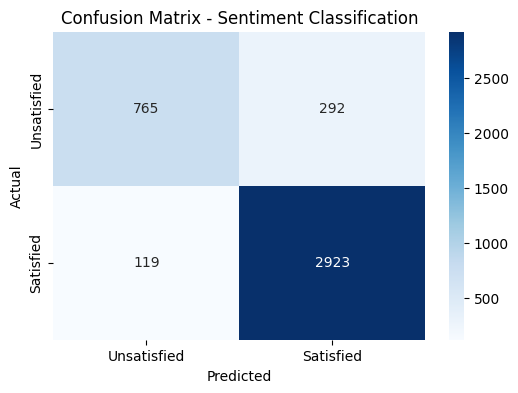

In [68]:
# Predict using sentiment model
y_pred_sentiment = model.predict(X_test)

# Confusion matrix
cm_sentiment = confusion_matrix(y_test, y_pred_sentiment)
labels = ['Unsatisfied', 'Satisfied']

# Plot the matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Sentiment Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/tmp/ipykernel_31566/1851082204.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sentiment_counts.values, palette='pastel')


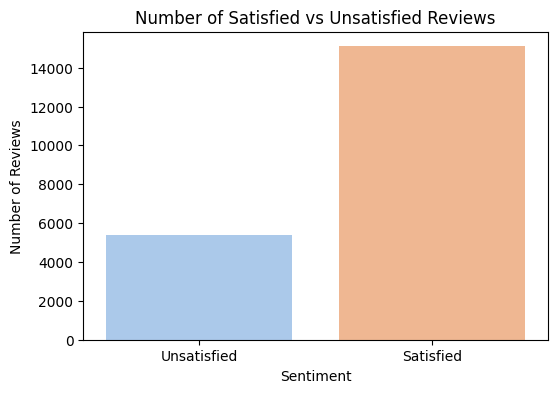

In [69]:
# Count values
sentiment_counts = df['Sentiment'].value_counts().sort_index()
labels = ['Unsatisfied', 'Satisfied']

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=sentiment_counts.values, palette='pastel')
plt.title('Number of Satisfied vs Unsatisfied Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()


In [70]:
X_rating = df['Cleaned_Review']
y_rating = df['Rating']

X_rating_tfidf = tfidf.fit_transform(X_rating)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rating_tfidf, y_rating, test_size=0.2, random_state=42)

model_rating = LogisticRegression(solver='lbfgs', max_iter=300)
model_rating.fit(X_train_r, y_train_r)
y_pred_r = model_rating.predict(X_test_r)

print("Rating Prediction Accuracy:", accuracy_score(y_test_r, y_pred_r))
print("\nClassification Report:\n", classification_report(y_test_r, y_pred_r))


Rating Prediction Accuracy: 0.6250304952427421

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.63      0.70       292
           2       0.45      0.41      0.43       333
           3       0.44      0.24      0.31       432
           4       0.54      0.50      0.52      1252
           5       0.70      0.85      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.58      0.53      0.54      4099
weighted avg       0.61      0.63      0.61      4099



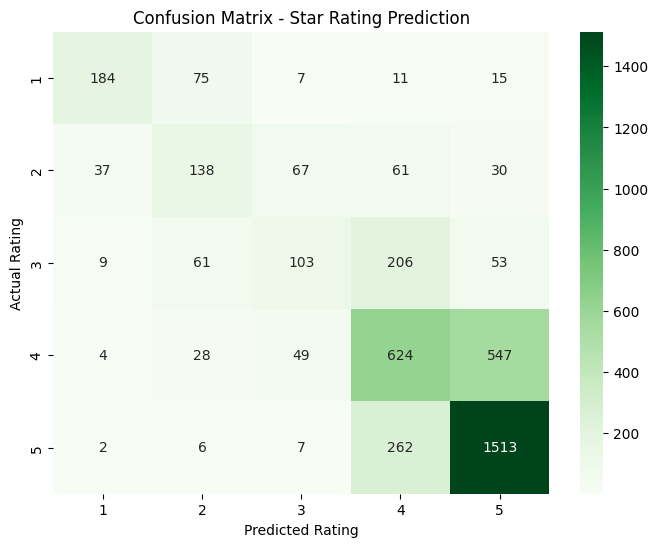

In [71]:
# Predict using rating model
y_pred_rating = model_rating.predict(X_test_r)

# Confusion matrix
cm_rating = confusion_matrix(y_test_r, y_pred_rating)
rating_labels = [1, 2, 3, 4, 5]

# Plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rating, annot=True, fmt='d', cmap='Greens', xticklabels=rating_labels, yticklabels=rating_labels)
plt.title('Confusion Matrix - Star Rating Prediction')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.show()


In [74]:
your_review = "i was an amazing experience, i liked it!"
your_cleaned = clean_text(your_review)
your_vec = tfidf.transform([your_cleaned])
sentiment = model.predict(your_vec)[0]
rating_pred = model_rating.predict(your_vec)[0]

print("Sentiment:", "Satisfied" if sentiment == 1 else "Unsatisfied")
print("Predicted Rating:", rating_pred)

Sentiment: Satisfied
Predicted Rating: 5


In [72]:
your_review = "The staff was friendly and the room was clean and beautiful!"
your_cleaned = clean_text(your_review)
your_vec = tfidf.transform([your_cleaned])
sentiment = model.predict(your_vec)[0]
rating_pred = model_rating.predict(your_vec)[0]

print("Sentiment:", "Satisfied" if sentiment == 1 else "Unsatisfied")
print("Predicted Rating:", rating_pred)


Sentiment: Satisfied
Predicted Rating: 4


In [56]:
your_review = "The staff was so bad but the room was clean!"
your_cleaned = clean_text(your_review)
your_vec = tfidf.transform([your_cleaned])
sentiment = model.predict(your_vec)[0]
rating_pred = model_rating.predict(your_vec)[0]

print("Sentiment:", "Satisfied" if sentiment == 1 else "Unsatisfied")
print("Predicted Rating:", rating_pred)


Sentiment: Unsatisfied
Predicted Rating: 3


In [73]:
your_review = "it was just okay!"
your_cleaned = clean_text(your_review)
your_vec = tfidf.transform([your_cleaned])
sentiment = model.predict(your_vec)[0]
rating_pred = model_rating.predict(your_vec)[0]

print("Sentiment:", "Satisfied" if sentiment == 1 else "Unsatisfied")
print("Predicted Rating:", rating_pred)

Sentiment: Unsatisfied
Predicted Rating: 2


In [57]:
your_review = "The staff was not friendly at all, i had a terrible experience!"
your_cleaned = clean_text(your_review)
your_vec = tfidf.transform([your_cleaned])
sentiment = model.predict(your_vec)[0]
rating_pred = model_rating.predict(your_vec)[0]

print("Sentiment:", "Satisfied" if sentiment == 1 else "Unsatisfied")
print("Predicted Rating:", rating_pred)


Sentiment: Unsatisfied
Predicted Rating: 1
